In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings


In [42]:
warnings.filterwarnings("ignore")
style.use('fivethirtyeight')

In [43]:
df=pd.read_csv('Covid.csv')
print(df)

           Date  Unnamed: 1 Unnamed: 2    cases deaths
0    30-01-2020         NaN        NaN      1.0    NaN
1    01-02-2020         NaN        NaN      1.0    NaN
2    02-02-2020         NaN          ?      2.0    NaN
3    03-02-2020         NaN          ?      3.0    NaN
4             ?         NaN          ?      3.0    NaN
..          ...         ...        ...      ...    ...
385         NaN         NaN          ?      NaN    NaN
386         NaN         NaN          ?      NaN    NaN
387  21-07-2020         NaN          ?  13994.0  44(+1
388         NaN         NaN          ?      NaN    NaN
389         NaN         NaN          ?      NaN    NaN

[390 rows x 5 columns]


In [44]:
df.loc[4,'Date']='05-02-2020'
print(df)

           Date  Unnamed: 1 Unnamed: 2    cases deaths
0    30-01-2020         NaN        NaN      1.0    NaN
1    01-02-2020         NaN        NaN      1.0    NaN
2    02-02-2020         NaN          ?      2.0    NaN
3    03-02-2020         NaN          ?      3.0    NaN
4    05-02-2020         NaN          ?      3.0    NaN
..          ...         ...        ...      ...    ...
385         NaN         NaN          ?      NaN    NaN
386         NaN         NaN          ?      NaN    NaN
387  21-07-2020         NaN          ?  13994.0  44(+1
388         NaN         NaN          ?      NaN    NaN
389         NaN         NaN          ?      NaN    NaN

[390 rows x 5 columns]


In [45]:
df=df[['Date','cases']]
df.dropna(inplace=True)
print(df)

           Date    cases
0    30-01-2020      1.0
1    01-02-2020      1.0
2    02-02-2020      2.0
3    03-02-2020      3.0
4    05-02-2020      3.0
..          ...      ...
375  17-07-2020  11066.0
378  18-07-2020  11659.0
381  19-07-2020  12480.0
384  20-07-2020  13274.0
387  21-07-2020  13994.0

[141 rows x 2 columns]


In [46]:
df['next_day_cases']=df['cases'].shift(+1)
df

,Date,cases,next_day_cases
0,30-01-2020,1.0,NaN
1,01-02-2020,1.0,1.0
2,02-02-2020,2.0,1.0
3,03-02-2020,3.0,2.0
4,05-02-2020,3.0,3.0
...,...,...,...
375,17-07-2020,11066.0,10275.0
378,18-07-2020,11659.0,11066.0
381,19-07-2020,12480.0,11659.0
384,20-07-2020,13274.0,12480.0


In [47]:
df['daily_cases']=df['cases']-df['next_day_cases']
df

,Date,cases,next_day_cases,daily_cases
0,30-01-2020,1.0,NaN,NaN
1,01-02-2020,1.0,1.0,0.0
2,02-02-2020,2.0,1.0,1.0
3,03-02-2020,3.0,2.0,1.0
4,05-02-2020,3.0,3.0,0.0
...,...,...,...,...
375,17-07-2020,11066.0,10275.0,791.0
378,18-07-2020,11659.0,11066.0,593.0
381,19-07-2020,12480.0,11659.0,821.0
384,20-07-2020,13274.0,12480.0,794.0


In [48]:
df=df.iloc[1:,:]
df

,Date,cases,next_day_cases,daily_cases
1,01-02-2020,1.0,1.0,0.0
2,02-02-2020,2.0,1.0,1.0
3,03-02-2020,3.0,2.0,1.0
4,05-02-2020,3.0,3.0,0.0
5,08-03-2020,8.0,3.0,5.0
...,...,...,...,...
375,17-07-2020,11066.0,10275.0,791.0
378,18-07-2020,11659.0,11066.0,593.0
381,19-07-2020,12480.0,11659.0,821.0
384,20-07-2020,13274.0,12480.0,794.0


In [49]:
df=df[['Date','cases','daily_cases']]
df

,Date,cases,daily_cases
1,01-02-2020,1.0,0.0
2,02-02-2020,2.0,1.0
3,03-02-2020,3.0,1.0
4,05-02-2020,3.0,0.0
5,08-03-2020,8.0,5.0
...,...,...,...
375,17-07-2020,11066.0,791.0
378,18-07-2020,11659.0,593.0
381,19-07-2020,12480.0,821.0
384,20-07-2020,13274.0,794.0


In [52]:
df.loc['Date']=pd.to_datetime(df.Date)
# print(df)
dt_str=dt.date(2020,1,2)
dt_stp=dt.date(2020,7,21)
no_of_days=dt_stp-dt_str
print(no_of_days)
print(len(df))

201 days, 0:00:00
141


In [53]:
days=[]

for i in range(1,len(df)+1):
    days.append(i)
print(days)
df["Days"]=days
df

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141]


,Date,cases,daily_cases,Days
1,01-02-2020,1,0,1
2,02-02-2020,2,1,2
3,03-02-2020,3,1,3
4,05-02-2020,3,0,4
5,08-03-2020,8,5,5
...,...,...,...,...
378,18-07-2020,11659,593,137
381,19-07-2020,12480,821,138
384,20-07-2020,13274,794,139
387,21-07-2020,13994,720,140


In [54]:
df=df[:-1]
# df=df.set_index(df['Days'])


df
# print(df.tail(60))

,Date,cases,daily_cases,Days
1,01-02-2020,1,0,1
2,02-02-2020,2,1,2
3,03-02-2020,3,1,3
4,05-02-2020,3,0,4
5,08-03-2020,8,5,5
...,...,...,...,...
375,17-07-2020,11066,791,136
378,18-07-2020,11659,593,137
381,19-07-2020,12480,821,138
384,20-07-2020,13274,794,139


In [55]:
df=df.set_index(df['Days'])
df

,Date,cases,daily_cases,Days
Days,,,,
1,01-02-2020,1,0,1
2,02-02-2020,2,1,2
3,03-02-2020,3,1,3
4,05-02-2020,3,0,4
5,08-03-2020,8,5,5
...,...,...,...,...
136,17-07-2020,11066,791,136
137,18-07-2020,11659,593,137
138,19-07-2020,12480,821,138


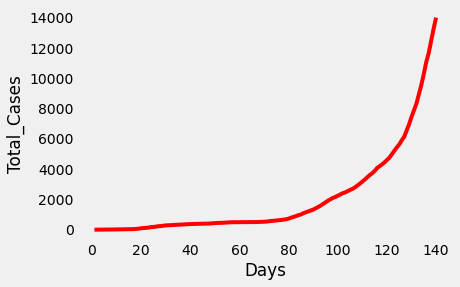

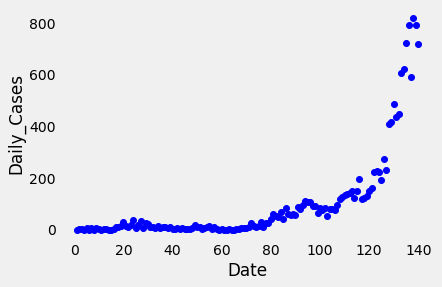

In [56]:
xs=df.index
ys=df['cases']
ys2=df['daily_cases']
#creating plots to visualize data
plt.plot(xs,ys,'r')
plt.xlabel('Days')
plt.ylabel('Total_Cases')
plt.grid()
plt.show()
plt.plot(xs,ys2,'bo')
plt.xlabel('Date')
plt.ylabel('Daily_Cases')
plt.rcParams['figure.figsize']=(8,6)
plt.grid()
plt.show()

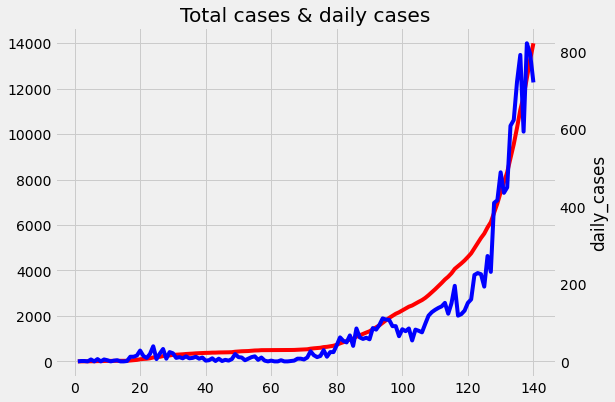

In [57]:
ax1=plt.subplot(1,1,1)
ax2=ax1.twinx()
curve1=ax1.plot(xs,ys,'r',label='Days')
plt.ylabel('days')
curve2=ax2.plot(xs,ys2,'b',label='daily_cases')
plt.xlabel("Date")
plt.ylabel("daily_cases")
plt.title("Total cases & daily cases")
plt.rcParams['figure.figsize']=(8,6)
plt.grid()
plt.show()

In [339]:
X=np.array(df['Days']).reshape(-1,1)
X.dtype

dtype('int64')

In [340]:
y=np.array(df['daily_cases'].values)
y

array([0.0, 1.0, 1.0, 0.0, 5.0, 0.0, 6.0, 0.0, 5.0, 3.0, 0.0, 2.0, 3.0,
       0.0, 0.0, 1.0, 12.0, 12.0, 15.0, 28.0, 14.0, 9.0, 19.0, 39.0, 6.0,
       20.0, 32.0, 7.0, 24.0, 21.0, 9.0, 11.0, 8.0, 13.0, 8.0, 9.0, 12.0,
       7.0, 10.0, 2.0, 3.0, 8.0, 1.0, 7.0, 1.0, 4.0, 2.0, 6.0, 19.0, 11.0,
       10.0, 3.0, 7.0, 11.0, 13.0, 4.0, 10.0, 2.0, 0.0, 2.0, 0.0, 0.0,
       3.0, 0.0, 0.0, 1.0, 2.0, 7.0, 7.0, 5.0, 10.0, 26.0, 16.0, 11.0,
       14.0, 29.0, 12.0, 24.0, 24.0, 42.0, 62.0, 53.0, 49.0, 67.0, 40.0,
       85.0, 62.0, 58.0, 61.0, 57.0, 86.0, 82.0, 94.0, 111.0, 108.0,
       107.0, 91.0, 91.0, 65.0, 83.0, 78.0, 85.0, 54.0, 82.0, 79.0, 75.0,
       97.0, 118.0, 127.0, 133.0, 138.0, 142.0, 151.0, 123.0, 150.0,
       195.0, 118.0, 122.0, 131.0, 151.0, 160.0, 223.0, 228.0, 225.0,
       193.0, 272.0, 231.0, 409.0, 416.0, 488.0, 435.0, 449.0, 608.0,
       623.0, 722.0, 791.0, 593.0, 821.0, 794.0, 720.0], dtype=object)

In [362]:
#split data into 85% and 15% to train and test the model.
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.16)


In [363]:
poly = PolynomialFeatures(degree=7)
x_poly=poly.fit_transform(X_train)
x_poly

array([[1.00000000e+00, 3.00000000e+00, 9.00000000e+00, 2.70000000e+01,
        8.10000000e+01, 2.43000000e+02, 7.29000000e+02, 2.18700000e+03],
       [1.00000000e+00, 6.20000000e+01, 3.84400000e+03, 2.38328000e+05,
        1.47763360e+07, 9.16132832e+08, 5.68002356e+10, 3.52161461e+12],
       [1.00000000e+00, 6.40000000e+01, 4.09600000e+03, 2.62144000e+05,
        1.67772160e+07, 1.07374182e+09, 6.87194767e+10, 4.39804651e+12],
       [1.00000000e+00, 7.60000000e+01, 5.77600000e+03, 4.38976000e+05,
        3.33621760e+07, 2.53552538e+09, 1.92699929e+11, 1.46451946e+13],
       [1.00000000e+00, 9.90000000e+01, 9.80100000e+03, 9.70299000e+05,
        9.60596010e+07, 9.50990050e+09, 9.41480149e+11, 9.32065348e+13],
       [1.00000000e+00, 8.20000000e+01, 6.72400000e+03, 5.51368000e+05,
        4.52121760e+07, 3.70739843e+09, 3.04006671e+11, 2.49285471e+13],
       [1.00000000e+00, 1.05000000e+02, 1.10250000e+04, 1.15762500e+06,
        1.21550625e+08, 1.27628156e+10, 1.34009564e+12, 1.

In [364]:
reg=LinearRegression()     #n_jobs=2


In [365]:
reg.fit(x_poly,y_train)

LinearRegression()

In [366]:
reg.coef_

array([ 0.00000000e+00, -1.61453470e+01,  1.74407371e+00, -7.24642912e-02,
        1.43751993e-03, -1.45663278e-05,  7.26253256e-08, -1.40346401e-10])

In [367]:
reg.intercept_

37.48678816057499

In [368]:
yp=reg.predict(x_poly)
yp

array([ 2.90382695e+00, -2.09905063e+00,  2.46259809e+00,  3.91190735e+01,
        7.80973468e+01,  5.64031776e+01,  8.49859525e+01,  1.05530810e+02,
        2.65704329e+02,  3.64815814e+02,  2.37004836e+00,  2.80268835e+01,
        2.82211744e+01,  1.00595984e+02, -1.17111828e+01,  5.11027704e+01,
        7.87976361e+01,  2.82921214e+01,  1.43123657e+02,  4.53019918e+01,
        1.17765849e+02,  2.58822011e+01,  1.42824577e+01,  7.87071317e+02,
        9.71738787e+00,  5.01163058e+00, -6.70234817e+00, -9.03381322e+00,
        7.74716394e+01, -8.67939869e-01,  1.97319875e+01,  3.37382597e+02,
        8.94655093e+00,  6.08635464e+02, -1.25839131e+00,  2.03543202e+01,
        1.51039297e+01,  1.65885135e+01,  6.32224380e+01,  4.22500440e+01,
        1.78656469e+02,  1.20169901e+01,  1.93101452e+02, -1.10829674e+01,
        2.43834112e+01,  1.16152136e+01,  1.11230144e+02, -9.73614819e+00,
        5.29720028e+02,  7.23853765e+01,  8.32248336e+01,  1.35248850e+01,
        2.45203276e+02,  

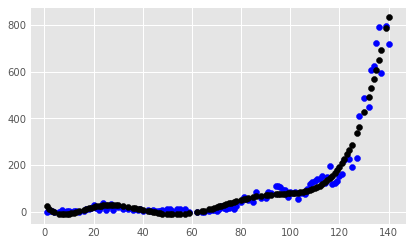

In [369]:
plt.scatter(X_train,y_train,color='b')
plt.scatter(X_train,yp,color='k')
style.use('ggplot')
plt.show()

In [370]:
reg.score(poly.fit_transform(X_test),y_test)*100

98.59252348309212

In [372]:
pred=reg.predict(poly.fit_transform([[len(df)+27]]))
pred

array([1747.45336332])

In [373]:
# Model has a real world accuracy of 97% .As model predicted a value of 1747 daily cases 
#  against the actual real world cases of 1725 on 17-08-2020 in kerla state

In [374]:
###This is for advanced predictions
# error_tolrnc=...       #error tolerance acquired through real world comparison
# final_prediction=pred*error_tolrnc
# final_prediction